## Data pre processing

In [19]:
import numpy as np
#import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate , learning_curve, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve,auc,f1_score,recall_score,precision_score, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import tree
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import chi2, f_classif , mutual_info_classif, SequentialFeatureSelector
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import multilabel_confusion_matrix
import pdb

In [2]:
X_df_in = pd.read_csv('train.csv')

In [3]:
X_df_in.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [4]:
X_df = X_df_in.drop(columns=['ID','Customer_ID','Month','SSN', 'Name','Type_of_Loan'], axis=1)
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

In [5]:
X_df_in.columns[:-1]

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [6]:
# Selecting float dtype columns
cont_columns = X_df.select_dtypes(['float64']).columns

# Selecting Object dtype columns
cat_columns = X_df.select_dtypes(['object']).columns

label_enc_list = []

for col in cat_columns:
    #Printing unique values in the categorical columns
    print(f"Unique Values of {col}")
    print(X_df[col].unique())
    print("==================================================")

    # Encoding categorical variables
    label_enc = LabelEncoder()
    X_df[col] = label_enc.fit_transform(X_df[col])

    # Store the encoder (for inverse transform)
    label_enc_list += [label_enc]

print(X_df.describe())

# Discretizing Continuous Columns
X_df2 = X_df
discretizer = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
discretizer.fit(X_df2[cont_columns])
X_df2[cont_columns] = discretizer.transform(X_df2[cont_columns])

X = X_df.iloc[:,:-1]
Y = X_df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20)

Y_test_onehot = pd.get_dummies(Y_test)



Unique Values of Occupation
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Unique Values of Credit_Mix
['Good' 'Standard' 'Bad']
Unique Values of Payment_of_Min_Amount
['No' 'NM' 'Yes']
Unique Values of Payment_Behaviour
['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']
Unique Values of Credit_Score
['Good' 'Standard' 'Poor']
                 Age     Occupation  Annual_Income  Monthly_Inhand_Salary  \
count  100000.000000  100000.000000  100000.000000          100000.000000   
mean       33.316340       6.949840   50505.123449            4197.270835   
std        10.764812       4.309542   38299.422093            3186.432497   
min        14.000000       0.000000    7005.930000             303.645417   


In [32]:
label_enc.inverse_transform([2])

array(['Standard'], dtype=object)

## Feature Selection

In [7]:
def analyse_features(X,Y,analysis_type):
    if analysis_type=="Chi2":
        chi2_stats , p_values = chi2(X,Y)
        ret_vals = [chi2_stats , p_values]
    elif analysis_type=="F Statistic" :
        f_stats , p_values = f_classif(X,Y)
        ret_vals = [f_stats , p_values]
    elif analysis_type=="Mutual Information" :
        mi = mutual_info_classif(X,Y)
        ret_vals = [mi]
    else:
        print("invalid analysis type")
        ret_vals = []
    return ret_vals

In [8]:
# All Features Discrete Analysis
analysis_types = ["Chi2","F Statistic","Mutual Information"]
a_scores_list = []
a_scores_norm_list = []
a_pvals_list = []
sort_features_list = []

for atype in analysis_types:
    feat_stats = analyse_features(X_df2.iloc[:,:-1],X_df2.iloc[:,-1],atype)
    a_scores_list += [feat_stats[0]]
    a_scores_norm_list += [feat_stats[0]/np.max(feat_stats[0])]
    sort_features_list += [np.flip(np.argsort(feat_stats[0]))]
    if atype != analysis_types[2]:
        a_pvals_list = [feat_stats[1]]

print(feat_stats[0]>0.099)


[False False False False False False  True False  True False False  True
  True  True False False  True False False False False]


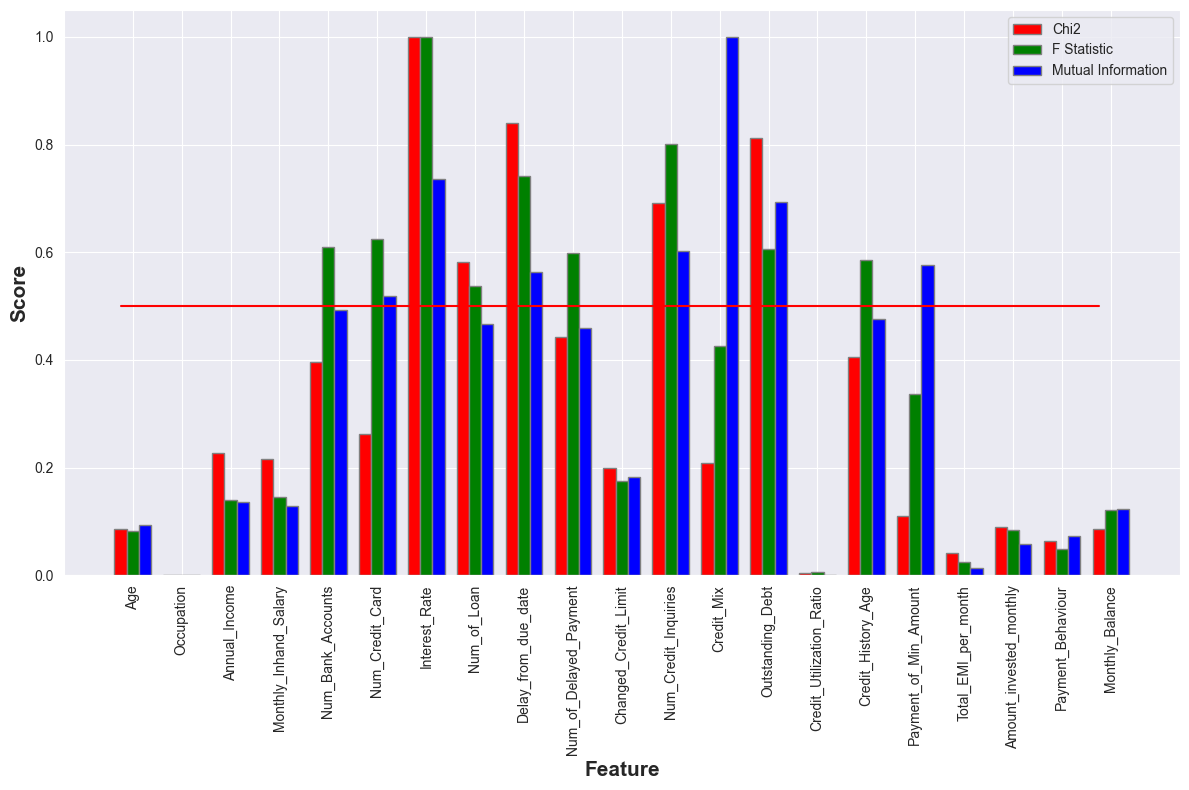

In [9]:
barWidth = 0.25
br1 = np.arange(len(X_df.columns[:-1]))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.figure(figsize=(12,8))
plt.bar(br1, a_scores_norm_list[0], color ='r', width = barWidth,
        edgecolor ='grey', label =analysis_types[0])
plt.bar(br2, a_scores_norm_list[1], color ='g', width = barWidth,
        edgecolor ='grey', label =analysis_types[1])
plt.bar(br3, a_scores_norm_list[2], color ='b', width = barWidth,
        edgecolor ='grey', label =analysis_types[2])
plt.plot(np.ones_like(a_scores_norm_list[0])*0.5,'r')

# Adding Xticks
plt.xlabel('Feature', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(a_scores_norm_list[0]))],X_df.columns[:-1],rotation=90)

plt.legend()
plt.tight_layout()
plt.savefig('/Users/sangitajayendran/Desktop/ML_mini_project/chi_bar.jpeg',dpi=300,
            pad_inches=1)
plt.show()

In [10]:
X_df.columns[:-1]

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

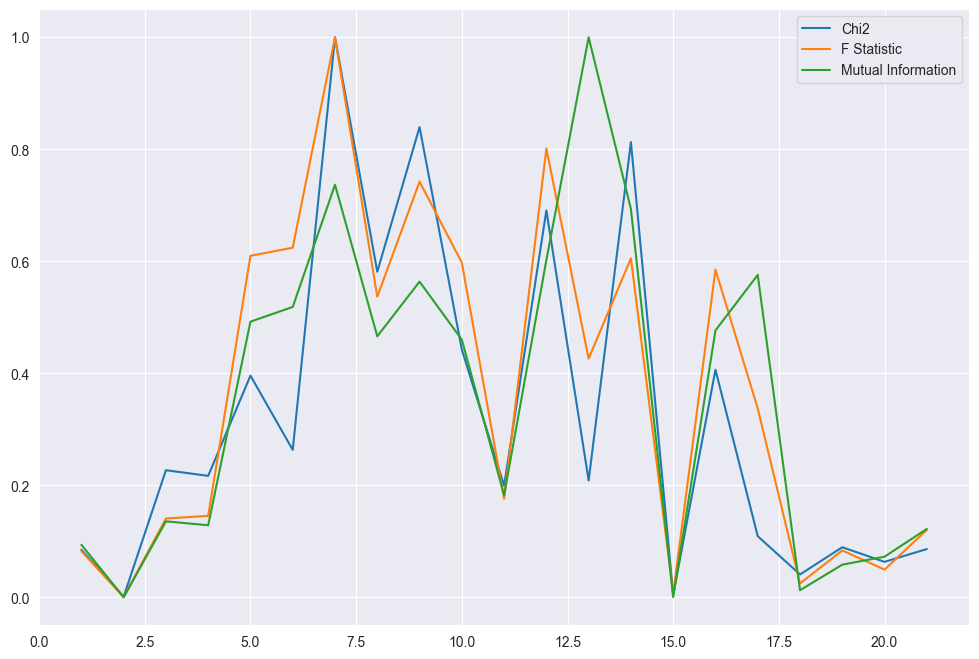

In [11]:
plt.figure(figsize=(12, 8))
features_list = np.arange(a_scores_list[0].size) + 1
plt.plot(features_list, a_scores_norm_list[0])
plt.plot(features_list, a_scores_norm_list[1])
plt.plot(features_list, a_scores_norm_list[2])
plt.legend(analysis_types)

In [12]:
# Relatively poor features as per all 3 tests are removed
selected_features = features_list[np.logical_not(np.logical_and(np.logical_and(a_scores_norm_list[0]<0.5,a_scores_norm_list[1] < 0.5), a_scores_norm_list[2] < 0.5))]-1
print(selected_features+1)

[ 5  6  7  8  9 10 12 13 14 16 17]


In [13]:
X_df.columns[:-1][selected_features]

Index(['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount'],
      dtype='object')

In [8]:
# Not All Features Discrete Analysis
analysis_types = ["Chi2","F Statistic","Mutual Information"]
a_scores_list = []
a_scores_norm_list = []
a_pvals_list = []
sort_features_list = []

for atype in analysis_types:
    feat_stats = analyse_features(X_df.iloc[:,:-1],X_df.iloc[:,-1],atype)
    a_scores_list += [feat_stats[0]]
    a_scores_norm_list += [feat_stats[0]/np.max(feat_stats[0])]
    sort_features_list += [np.flip(np.argsort(feat_stats[0]))]
    if atype != analysis_types[2]:
        a_pvals_list = [feat_stats[1]]

print(feat_stats[0]>0.099)


#print(feat_stats[1])

[False False False False False False  True False  True False False  True
  True  True False False  True False False False False]


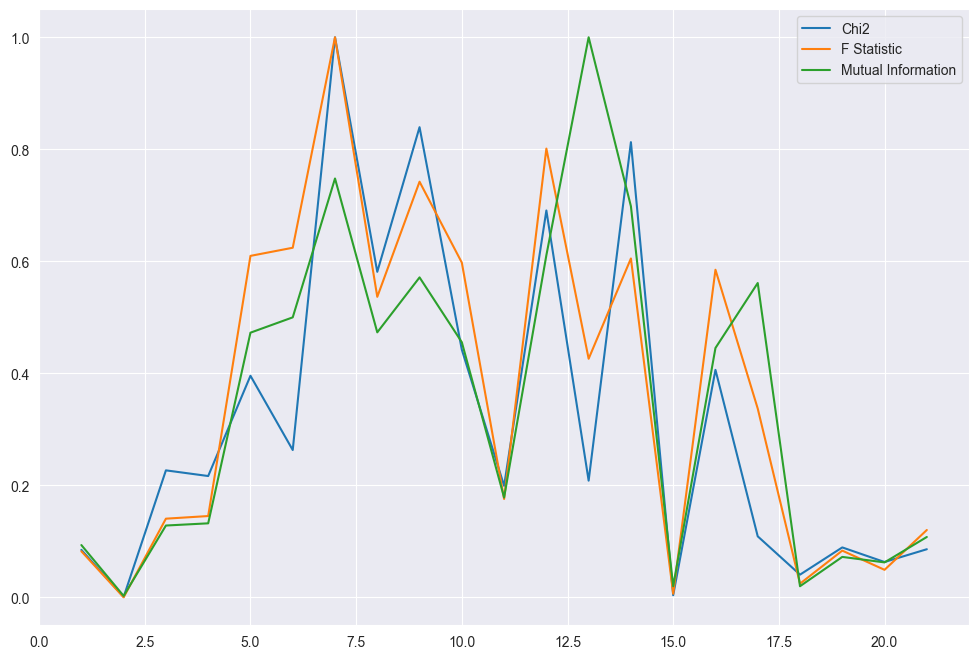

In [9]:
plt.figure(figsize=(12,8))
features_list = np.arange(a_scores_list[0].size)+1
plt.plot(features_list,a_scores_norm_list[0])
plt.plot(features_list,a_scores_norm_list[1])
plt.plot(features_list,a_scores_norm_list[2])
plt.legend(analysis_types)

In [17]:
print(np.sum(np.array(Y==0)),np.sum(np.array(Y==1)),np.sum(np.array(Y==2)))

17828 28998 53174


In [14]:
def plot_confidence_interval(x, values, z=1.96, color1='k',color2 ='r' , horizontal_line_width=0.2):
    means = np.mean(values,axis=1)
    stdev = np.std(values,axis=1)
    confidence_interval = z * stdev / np.sqrt(np.sum(values,axis=1))

    left = x - horizontal_line_width / 2
    top = means - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = means + confidence_interval
    #print(top,bottom)
    plt.plot([x, x], [top, bottom], color=color1,label='_nolegend_')
    plt.plot([left, right], [top, top], color=color1,label='_nolegend_')
    plt.plot([left, right], [bottom, bottom], color=color1,label='_nolegend_')
    plt.plot(x, means, '-o',color = color2)

    return means, confidence_interval

In [15]:
def learning_curve_plot(model,X,Y,title_str,img_loc):
    train_sizes = [500,1000] + list(range(2000,10000,2000))
    train_sizes, train_scores, test_scores = learning_curve(model,X,Y,scoring='accuracy',cv=5,train_sizes=train_sizes)
    plt.figure()
    #plt.ylim([0,1])
    plot_confidence_interval(train_sizes, train_scores, z=1.96, color1='b',color2 = 'g' ,horizontal_line_width=150)
    plot_confidence_interval(train_sizes, test_scores, z=1.96, color1='c',color2 = 'r', horizontal_line_width=150)
    plt.legend(["Training Curve","Testing Curve"])
    plt.title("Learning Curve " + title_str)
    plt.xlabel("Number of Examples")
    plt.ylabel("Accuracy")
    plt.savefig(img_loc+"_LC.png" )
    return train_scores,test_scores

In [16]:
def plot_wavg_interpolated__multiclass_roc(y_test_dummies,y_score):

    n_classes = y_test_dummies.shape[1]
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    mean_fpr = np.linspace(0, 1, 100)


    weights = np.sum(y_test_dummies,axis=0)
    mean_tpr = np.zeros_like(mean_fpr)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        interp_tpr = np.interp(mean_fpr,fpr[i],tpr[i])
        interp_tpr[0]=0.0
        mean_tpr += weights[i]*interp_tpr

    mean_tpr = mean_tpr/np.sum(weights)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    return [mean_fpr,mean_tpr],mean_auc


In [39]:
def model_analysis(model,X,Y,CV_splits,selected_features,model_name,image_loc,specs_name=None):
    # Feature Selection Based on Statistics
    X_sel_stat = X.iloc[:,selected_features]

    #Feature Selection using Forward Selection
    #feature_selector = SequentialFeatureSelector(model, n_features_to_select='auto', tol=0.005, direction='forward',cv=5)
    #feature_selector.fit(X, Y)
    #X_sel_forward = X.iloc[:,feature_selector.get_support()]
    #X_sel_forward = X.iloc[:,selected_features]
    print("**************")
    print(X_sel_stat)
    print("**************")
    #print(X_sel_forward)
    X_list = [X,X_sel_stat]#,X_sel_forward]
    X_types = ["Full Data","Statistics based Data"]#,"Forward Selection based Data"]
    X_type_save = ["Full","Stats"]#,"Forwards"]
    train_acc_dict = {}
    test_acc_dict = {}
    f1_score_dict = {}
    recall_dict = {}
    precision_dict = {}
    auc_score_dict = {}
    roc_vals_dict = {}
    avg_train_acc = []
    avg_test_acc = []
    avg_f1 = []
    avg_auc = []
    avg_recall = []
    avg_precision = []
    for ind_X,X_type in enumerate(X_types):
        X_in = X_list[ind_X]
        #learning_curve_plot(model,X_in,Y,X_type +" "+model_name,image_loc+"_"+X_type_save[ind_X])
        train_acc_list = []
        test_acc_list = []
        f1_score_list = []
        auc_score_list = []
        roc_vals_list = []
        recall_list = []
        precision_list = []
        conf_mat = np.zeros((3,3))
        for fold_no,(train_ind,test_ind) in enumerate(CV_splits):
            Xtrain, Xtest = X_in.iloc[train_ind,:], X_in.iloc[test_ind,:]
            Ytrain, Ytest = Y.iloc[train_ind], Y.iloc[test_ind]
            Ytest_onehot = pd.get_dummies(Ytest).values

            model.fit(Xtrain, Ytrain)
            Y_prime_train = model.predict(Xtrain)
            train_acc_list += [accuracy_score(Ytrain, Y_prime_train)]
            Y_prime = model.predict(Xtest)
            predicted_probs = model.predict_proba(Xtest)
            test_acc_list += [accuracy_score(Ytest, Y_prime)]

            conf_mat += confusion_matrix(Ytest, Y_prime)

            #print("confusion matrix",conf_mat)
            # print("Recall",r)
            # print("Precision",precision)

            f1_score_list += [f1_score(Ytest,Y_prime,average="weighted")]
            recall_list += [recall_score(Ytest, Y_prime,average = "weighted")]
            precision_list += [precision_score(Ytest, Y_prime,average = "weighted")]

            roc_vals,mean_auc = plot_wavg_interpolated__multiclass_roc(Ytest_onehot, predicted_probs)
            # print("fold number and roc vlas -")
            # print(fold_no,roc_vals)
            auc_score_list += [mean_auc]
            roc_vals_list += [roc_vals]
            if specs_name==None:
                print("**********************************")
                print(model_name,"-",X_type," Fold No --> ", fold_no)
                print("Train Accuracy -", train_acc_list[fold_no],"Test Accuracy -", test_acc_list[fold_no])
                print("ROC avg area under the curve",mean_auc)
                print("Recall Score ", recall_list[fold_no])
                print("Precision Score ", precision_list[fold_no])
                print("F1 Score ", f1_score_list[fold_no])
                print("**********************************")
            else:
                print("**********************************")
                print(model_name,"-",X_type,specs_name," Fold No --> ", fold_no)
                print("Train Accuracy -", train_acc_list[fold_no],"Test Accuracy -", test_acc_list[fold_no])
                print("ROC avg area under the curve",mean_auc)
                print("Recall Score ", recall_list[fold_no])
                print("Precision Score ", precision_list[fold_no])
                print("F1 Score ", f1_score_list[fold_no])
                print("**********************************")
        train_acc_dict[ind_X] = train_acc_list
        test_acc_dict[ind_X] = test_acc_list
        f1_score_dict[ind_X] = f1_score_list
        auc_score_dict[ind_X] = auc_score_list
        roc_vals_dict[ind_X] = roc_vals_list
        recall_dict[ind_X] = recall_list
        precision_dict[ind_X] = precision_list
        conf_mat = (conf_mat/5).astype(int)
        disp = ConfusionMatrixDisplay(conf_mat)
        disp.plot()
        plt.tick_params(axis=u'both', which=u'both',length=0)
        plt.grid(b=None)
        plt.title("Confusion Matrix - "+ X_type +" "+model_name)
        plt.savefig(image_loc+"_"+ X_type_save[ind_X] +"_ConfMat.png")
        plt.show()

        avg_train_acc += [np.mean(train_acc_list)]
        avg_test_acc += [np.mean(test_acc_list)]
        avg_f1 += [np.mean(f1_score_list)]
        avg_auc += [np.mean(roc_vals_list)]
        avg_recall +=[np.mean(recall_list)]
        avg_precision += [np.mean(precision_list)]



    rank_train = np.argsort(np.argsort(avg_train_acc))
    rank_test = np.argsort(np.argsort(avg_test_acc))
    rank_f1 = np.argsort(np.argsort(avg_f1))
    rank_auc = np.argsort(np.argsort(avg_auc))
    combined_rank = rank_train+1.25*rank_test+rank_f1+rank_auc
    combined_positions = np.flip(np.argsort(combined_rank))
    combined_norm_score = (avg_train_acc/np.max(avg_train_acc))+1.25*(avg_test_acc/np.max(avg_test_acc))+(avg_f1/np.max(avg_f1))+(avg_auc/np.max(avg_auc))

    avg_dict = {"Train Accuracy":avg_train_acc,"Test Accuracy":avg_test_acc,"Precision":avg_precision,"Recall":avg_recall,"F1 Score":avg_f1,"AUC Score":avg_auc,"Combined Normalized Scores":combined_norm_score,"Combined Rank": combined_rank}

    plt.figure()

    for inds2 in range(len(X_types)):
        avg_kfold_fpr = np.zeros_like(np.array(roc_vals_dict[inds2][0][0])) #index, fold number, tpr
        avg_kfold_tpr = np.zeros_like(np.array(roc_vals_dict[inds2][0][1]))
        for inds3 in range(5):
            avg_kfold_fpr += roc_vals_dict[inds2][inds3][0]
            avg_kfold_tpr += roc_vals_dict[inds2][inds3][1]
        plt.plot(avg_kfold_fpr/5,avg_kfold_tpr/5)
    plt.legend(X_types)
    plt.title("Average Multiclass Weighted ROC - "+ model_name)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.savefig(image_loc+"_ROC.png")
    plt.show()
    print("*********Summary***********")
    print("Avg Train Accuracies",avg_train_acc)
    print("Avg test Accuracies",avg_test_acc)
    print("Avg avg f1_scores Accuracies",avg_f1)
    print("Avg auc Accuracies",avg_auc)
    print("Ranking based on combined scores",np.array(X_types)[combined_positions])
    best_X = combined_positions[0]
    print("Best Selected Model",X_types[best_X])
    print(pd.DataFrame(avg_dict))
    return train_acc_dict,test_acc_dict[best_X],f1_score_dict[best_X],auc_score_dict[best_X],roc_vals_dict[best_X],avg_dict


**************
       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    1.0              2.0            0.0          2.0   
1                    1.0              2.0            0.0          2.0   
2                    1.0              2.0            0.0          2.0   
3                    1.0              2.0            0.0          2.0   
4                    1.0              2.0            0.0          2.0   
...                  ...              ...            ...          ...   
99995                2.0              3.0            1.0          1.0   
99996                2.0              3.0            1.0          1.0   
99997                2.0              3.0            1.0          1.0   
99998                2.0              3.0            1.0          1.0   
99999                2.0              3.0            1.0          1.0   

       Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                      0.0      

/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**********************************
Neural Network - Full Data Default  Fold No -->  0
Train Accuracy - 0.7080875 Test Accuracy - 0.68025
ROC avg area under the curve 0.7982356248193098
Recall Score  0.68025
Precision Score  0.6802647013574059
F1 Score  0.6764254627444858
**********************************


/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**********************************
Neural Network - Full Data Default  Fold No -->  1
Train Accuracy - 0.5317375 Test Accuracy - 0.53175
ROC avg area under the curve 0.5
Recall Score  0.53175
Precision Score  0.28275806249999996
F1 Score  0.3691960992329035
**********************************
**********************************
Neural Network - Full Data Default  Fold No -->  2
Train Accuracy - 0.71025 Test Accuracy - 0.7034
ROC avg area under the curve 0.8317221590074986
Recall Score  0.7034
Precision Score  0.7073394150651913
F1 Score  0.7040322952971849
**********************************


/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**********************************
Neural Network - Full Data Default  Fold No -->  3
Train Accuracy - 0.711725 Test Accuracy - 0.6843
ROC avg area under the curve 0.8206567748188961
Recall Score  0.6843
Precision Score  0.6894545084339304
F1 Score  0.6853397375577795
**********************************


/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_2078/1426244975.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


**********************************
Neural Network - Full Data Default  Fold No -->  4
Train Accuracy - 0.7103375 Test Accuracy - 0.70085
ROC avg area under the curve 0.8319169805359745
Recall Score  0.70085
Precision Score  0.7034291246423616
F1 Score  0.701366898526036
**********************************


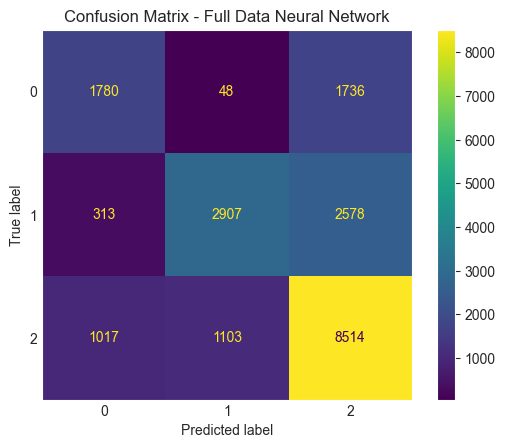

**********************************
Neural Network - Statistics based Data Default  Fold No -->  0
Train Accuracy - 0.6942125 Test Accuracy - 0.67565
ROC avg area under the curve 0.8118956135387869
Recall Score  0.67565
Precision Score  0.6767605581798836
F1 Score  0.6742738890718197
**********************************
**********************************
Neural Network - Statistics based Data Default  Fold No -->  1
Train Accuracy - 0.686925 Test Accuracy - 0.67325
ROC avg area under the curve 0.8159581948842922
Recall Score  0.67325
Precision Score  0.6717722955995001
F1 Score  0.6691398890915697
**********************************
**********************************
Neural Network - Statistics based Data Default  Fold No -->  2
Train Accuracy - 0.6916375 Test Accuracy - 0.68835
ROC avg area under the curve 0.8241794196713478
Recall Score  0.68835
Precision Score  0.7072133880321358
F1 Score  0.6913382468981343
**********************************
**********************************
Neural Ne

/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_2078/1426244975.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


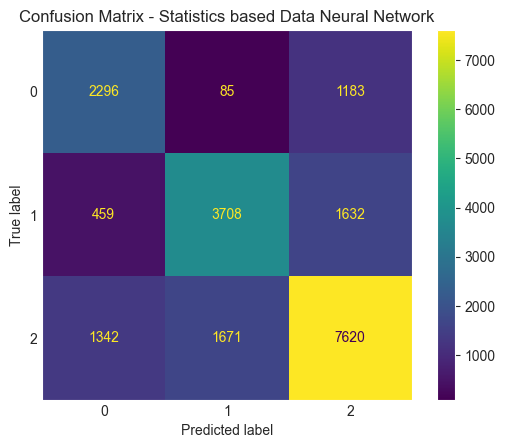

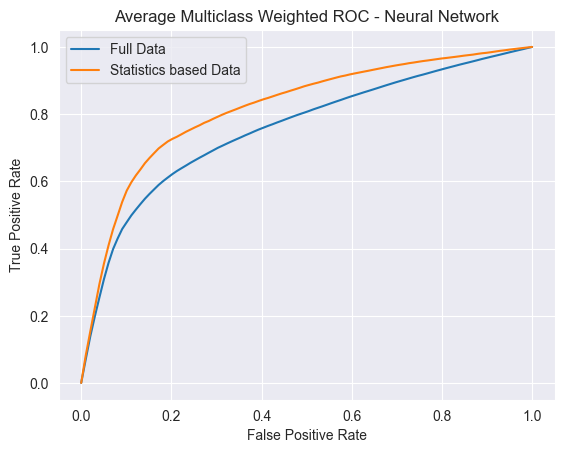

*********Summary***********
Avg Train Accuracies [0.6744275, 0.6917375]
Avg test Accuracies [0.66011, 0.68125]
Avg avg f1_scores Accuracies [0.6272720986716779, 0.6813330941164571]
Avg auc Accuracies [0.6269706223789863, 0.657665797332276]
Ranking based on combined scores ['Statistics based Data' 'Full Data']
Best Selected Model Statistics based Data
   Train Accuracy  Test Accuracy  Precision   Recall  F1 Score  AUC Score  \
0        0.674427        0.66011   0.612649  0.66011  0.627272   0.626971   
1        0.691738        0.68125   0.687894  0.68125  0.681333   0.657666   

   Combined Normalized Scores  Combined Rank  
0                    4.060168           0.00  
1                    4.250000           4.25  


In [40]:
neural_net_model = MLPClassifier(hidden_layer_sizes =(20,10,3,),learning_rate="invscaling", verbose=False, n_iter_no_change=10)#hidden_layer_sizes =(100,),verbose=True)# (50,20,3))

cv = StratifiedKFold()
cv_splits = cv.split(X,Y)
CV_splits_list = []
for splits in cv_splits:
    CV_splits_list += [splits]

t6,te6,f16,auc_score6,roc_vals6,results_dict_nn = model_analysis(neural_net_model,X,Y,CV_splits_list,selected_features,"Neural Network",specs_name="Default",image_loc="Images/Neural_Networks/nn")

# train_acc_model_list_d.append(t6)
# test_acc_model_list_d.append(te6)
# f1_score_model_list_d.append(f16)
# auc_score_model_list_d.append(auc_score6)
# roc_vals_model_list_d.append(roc_vals6)

In [18]:
train_acc_model_list_d = []
test_acc_model_list_d = []
f1_score_model_list_d = []
auc_score_model_list_d = []
roc_vals_model_list_d = []

/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_2078/3926468265.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


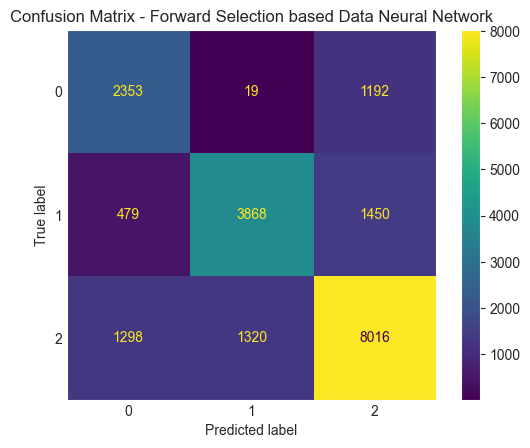

In [53]:
conf_mat2 = np.array([[2353,19,1192],[479,3868,1450],[1298,1320,8016]])
disp = ConfusionMatrixDisplay(conf_mat2)
disp.plot()
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.title("Confusion Matrix - Forward Selection based Data Neural Network")
plt.savefig("Images/Neural_Networks/nn_Forwards_ConfMat.png")
plt.show()

In [54]:
roc_vals6

[[array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
         0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
         0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
         0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
         0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
         0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
         0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
         0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
         0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
         0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
         0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
         0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
         0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
         0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
         0.70707071, 0.71717172, 0

In [41]:
71*20000/100

14200.0

In [44]:
(2353 + 3868 + 8016

14237

In [49]:
1477 + 1128 + 8029 -8016 - 1298

1320

**************
       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    1.0              2.0            0.0          2.0   
1                    1.0              2.0            0.0          2.0   
2                    1.0              2.0            0.0          2.0   
3                    1.0              2.0            0.0          2.0   
4                    1.0              2.0            0.0          2.0   
...                  ...              ...            ...          ...   
99995                2.0              3.0            1.0          1.0   
99996                2.0              3.0            1.0          1.0   
99997                2.0              3.0            1.0          1.0   
99998                2.0              3.0            1.0          1.0   
99999                2.0              3.0            1.0          1.0   

       Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                      0.0      

/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

**********************************
Logistic Regression  - Full Data Default  Fold No -->  0
Train Accuracy - 0.651225 Test Accuracy - 0.6405
ROC avg area under the curve 0.7774160799918376
Recall Score  0.6405
Precision Score  0.6390803113563502
F1 Score  0.6356234507848201
**********************************


/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**********************************
Logistic Regression  - Full Data Default  Fold No -->  1
Train Accuracy - 0.6481125 Test Accuracy - 0.65315
ROC avg area under the curve 0.7852816090194878
Recall Score  0.65315
Precision Score  0.6523101953620087
F1 Score  0.6484962545766295
**********************************


/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**********************************
Logistic Regression  - Full Data Default  Fold No -->  2
Train Accuracy - 0.647775 Test Accuracy - 0.64895
ROC avg area under the curve 0.7856700030609122
Recall Score  0.64895
Precision Score  0.6471872531376438
F1 Score  0.6447974934080419
**********************************


/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**********************************
Logistic Regression  - Full Data Default  Fold No -->  3
Train Accuracy - 0.64915 Test Accuracy - 0.64095
ROC avg area under the curve 0.7763073461891644
Recall Score  0.64095
Precision Score  0.6397146248173649
F1 Score  0.6367527980261549
**********************************


/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_862/670102968.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


**********************************
Logistic Regression  - Full Data Default  Fold No -->  4
Train Accuracy - 0.6467375 Test Accuracy - 0.65285
ROC avg area under the curve 0.7900166539128659
Recall Score  0.65285
Precision Score  0.6529604368235571
F1 Score  0.6479381991898127
**********************************


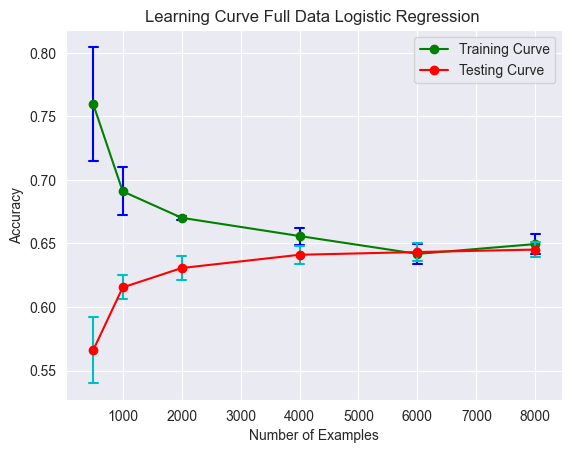

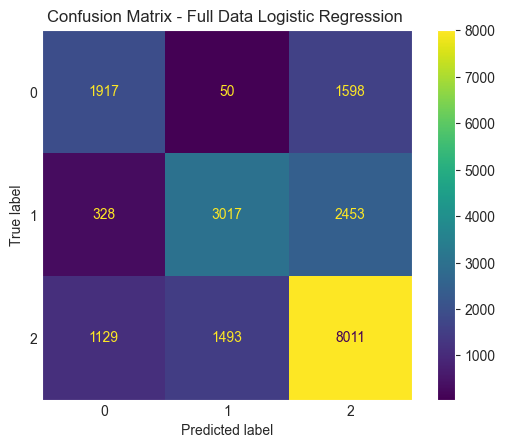

/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

**********************************
Logistic Regression  - Statistics based Data Default  Fold No -->  0
Train Accuracy - 0.6371 Test Accuracy - 0.631
ROC avg area under the curve 0.7623336968713105
Recall Score  0.631
Precision Score  0.628579181878372
F1 Score  0.6272698870660446
**********************************
**********************************
Logistic Regression  - Statistics based Data Default  Fold No -->  1
Train Accuracy - 0.6332875 Test Accuracy - 0.64035
ROC avg area under the curve 0.7692236674829099
Recall Score  0.64035
Precision Score  0.63844262639257
F1 Score  0.6369750554313393
**********************************
**********************************
Logistic Regression  - Statistics based Data Default  Fold No -->  2
Train Accuracy - 0.6352125 Test Accuracy - 0.632
ROC avg area under the curve 0.7655343592612026
Recall Score  0.632
Precision Score  0.6293213796102753
F1 Score  0.629210464646203
**********************************


/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**********************************
Logistic Regression  - Statistics based Data Default  Fold No -->  3
Train Accuracy - 0.636525 Test Accuracy - 0.6262
ROC avg area under the curve 0.7611391388512347
Recall Score  0.6262
Precision Score  0.6238001026301158
F1 Score  0.6225539567545234
**********************************


/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_862/670102968.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


**********************************
Logistic Regression  - Statistics based Data Default  Fold No -->  4
Train Accuracy - 0.632325 Test Accuracy - 0.64145
ROC avg area under the curve 0.7730088832610215
Recall Score  0.64145
Precision Score  0.6398510361479406
F1 Score  0.6383752452585197
**********************************


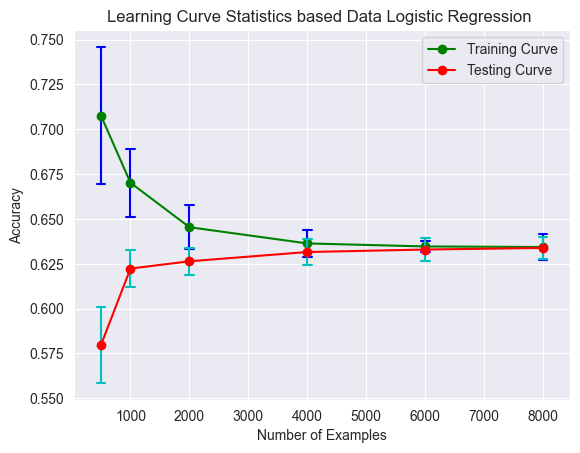

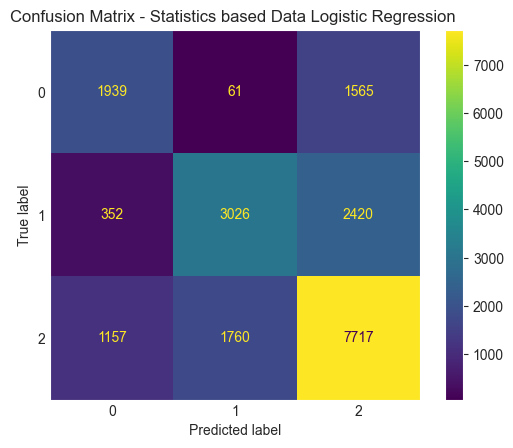

**********************************
Logistic Regression  - Forward Selection based Data Default  Fold No -->  0
Train Accuracy - 0.6417875 Test Accuracy - 0.63655
ROC avg area under the curve 0.7690013826214311
Recall Score  0.63655
Precision Score  0.6336222170291105
F1 Score  0.6289883550878514
**********************************
**********************************
Logistic Regression  - Forward Selection based Data Default  Fold No -->  1
Train Accuracy - 0.6393125 Test Accuracy - 0.64225
ROC avg area under the curve 0.7737530755471166
Recall Score  0.64225
Precision Score  0.640365683765348
F1 Score  0.6339909486069035
**********************************
**********************************
Logistic Regression  - Forward Selection based Data Default  Fold No -->  2
Train Accuracy - 0.638225 Test Accuracy - 0.63825
ROC avg area under the curve 0.7724436361394225
Recall Score  0.63825
Precision Score  0.6347894511730388
F1 Score  0.6304646235840462
**********************************
******

/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_862/670102968.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


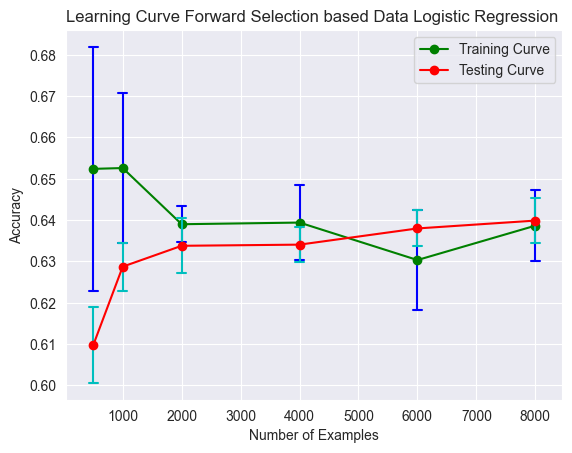

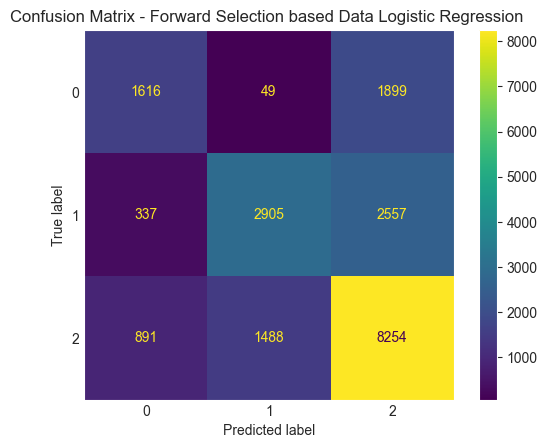

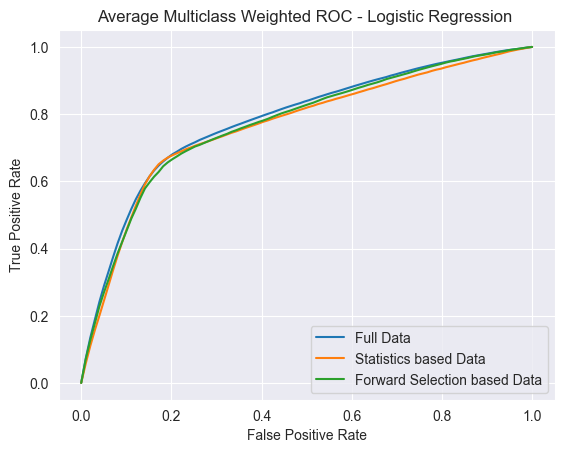

*********Summary***********
Avg Train Accuracies [0.6486, 0.6348900000000001, 0.6393549999999999]
Avg test Accuracies [0.6472800000000001, 0.6342, 0.6388100000000001]
Avg avg f1_scores Accuracies [0.6427216391970918, 0.6308769218313259, 0.630368322914042]
Avg auc Accuracies [0.6400544775252526, 0.6317927348270402, 0.6348274907132554]
Ranking based on combined scores ['Full Data' 'Forward Selection based Data' 'Statistics based Data']
Best Selected Model Full Data
   Train Accuracy  Test Accuracy  Precision   Recall  F1 Score  AUC Score  \
0        0.648600        0.64728   0.646251  0.64728  0.642722   0.640054   
1        0.634890        0.63420   0.631999  0.63420  0.630877   0.631793   
2        0.639355        0.63881   0.636340  0.63881  0.630368   0.634827   

   Combined Normalized Scores  Combined Rank  
0                    4.250000           8.50  
1                    4.172266           1.00  
2                    4.192003           3.25  


In [54]:
Lr_classifier = LogisticRegression()
cv = StratifiedKFold()
cv_splits = cv.split(X,Y)
CV_splits_list = []
for splits in cv_splits:
    CV_splits_list += [splits]

#train_acc_dict,test_acc_dict,f1_score_dict,auc_score_dict,roc_vals_dict = model_analysis(Lr_classifier,X,Y,CV_splits_list,selected_features,"Linear Regression ",specs_name="Default")

t,te,f1,auc_score,roc_vals,results_dict_lr = model_analysis(Lr_classifier,X,Y,CV_splits_list,selected_features,"Logistic Regression ",specs_name="Default",image_loc="Images/Logistic_Regression/LR")

train_acc_model_list_d.append(t)
test_acc_model_list_d.append(te)
f1_score_model_list_d.append(f1)
auc_score_model_list_d.append(auc_score)
roc_vals_model_list_d.append(roc_vals)


In [17]:
np.sum(np.array(roc_vals)>1)


0

**************
       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    1.0              2.0            0.0          2.0   
1                    1.0              2.0            0.0          2.0   
2                    1.0              2.0            0.0          2.0   
3                    1.0              2.0            0.0          2.0   
4                    1.0              2.0            0.0          2.0   
...                  ...              ...            ...          ...   
99995                2.0              3.0            1.0          1.0   
99996                2.0              3.0            1.0          1.0   
99997                2.0              3.0            1.0          1.0   
99998                2.0              3.0            1.0          1.0   
99999                2.0              3.0            1.0          1.0   

       Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                      0.0      

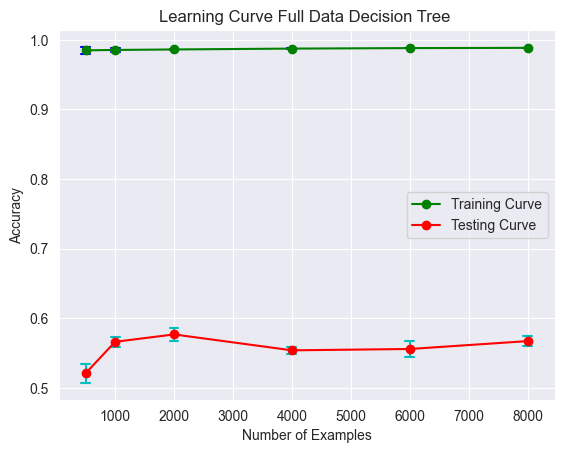

In [22]:
Dt_classifier = tree.DecisionTreeClassifier()
cv = StratifiedKFold()
cv_splits = cv.split(X,Y)
CV_splits_list = []
for splits in cv_splits:
    CV_splits_list += [splits]

t2,te2,f12,auc_score2,roc_vals2,results_dict = model_analysis(Dt_classifier,X,Y,CV_splits_list,selected_features,"Decision Tree ",specs_name="Default",image_loc="Images/Decision_Tree/DT")
train_acc_model_list_d.append(t2)
test_acc_model_list_d.append(te2)
f1_score_model_list_d.append(f12)
auc_score_model_list_d.append(auc_score2)
roc_vals_model_list_d.append(roc_vals2)

In [53]:
pd.DataFrame(results_dict)

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC Score,Combined Normalized Scores,Combined Rank
0,0.989903,0.57446,0.575127,0.57446,0.574735,0.570226,3.774878,2.00
1,0.869538,0.57723,0.584072,0.57723,0.579752,0.582892,3.685225,4.25
2,0.687200,0.68171,0.691814,0.68171,0.681043,0.649734,3.944210,6.50


[[0.6778160457405732, 0.6764529009073645, 0.6848827933338857, 0.6746814700130362, 0.6913828310327932]]


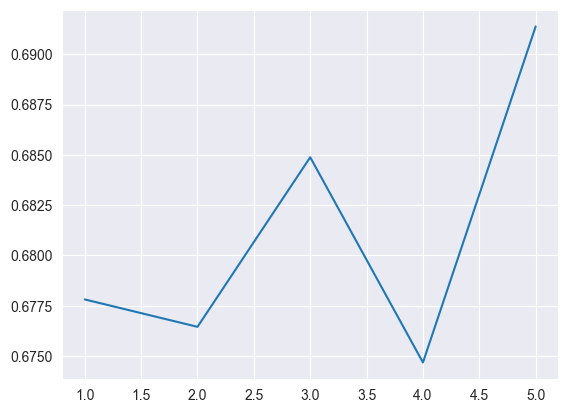

In [122]:
print(f1_score_model_list_d)
fold_no = [1,2,3,4,5]
plt.figure()
plt.plot(fold_no,f1_score_model_list_d[0])
plt.show()


In [23]:
np.sum(np.array(roc_vals2)>1)

0

**************
       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    1.0              2.0            0.0          2.0   
1                    1.0              2.0            0.0          2.0   
2                    1.0              2.0            0.0          2.0   
3                    1.0              2.0            0.0          2.0   
4                    1.0              2.0            0.0          2.0   
...                  ...              ...            ...          ...   
99995                2.0              3.0            1.0          1.0   
99996                2.0              3.0            1.0          1.0   
99997                2.0              3.0            1.0          1.0   
99998                2.0              3.0            1.0          1.0   
99999                2.0              3.0            1.0          1.0   

       Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                      0.0      

/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_862/670102968.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


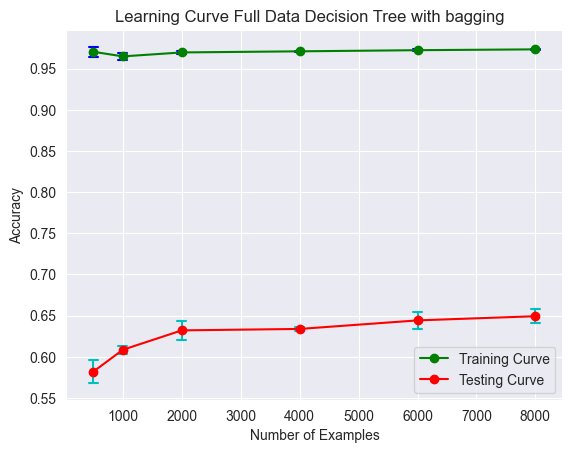

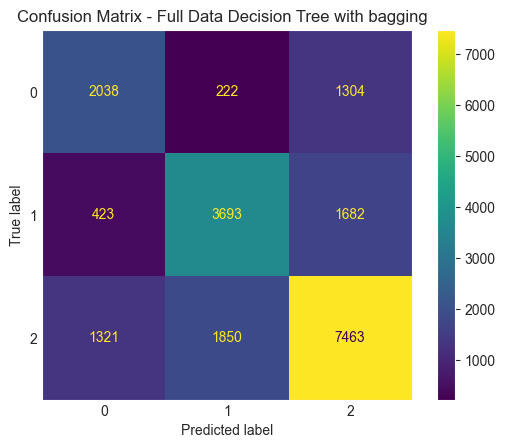

**********************************
Decision Tree with bagging   - Statistics based Data Default  Fold No -->  0
Train Accuracy - 0.8647375 Test Accuracy - 0.63065
ROC avg area under the curve 0.7466016522625454
Recall Score  0.63065
Precision Score  0.6304416088985845
F1 Score  0.6305268980214203
**********************************
**********************************
Decision Tree with bagging   - Statistics based Data Default  Fold No -->  1
Train Accuracy - 0.865025 Test Accuracy - 0.63355
ROC avg area under the curve 0.7482555326189634
Recall Score  0.63355
Precision Score  0.6330174021824385
F1 Score  0.633271812897997
**********************************
**********************************
Decision Tree with bagging   - Statistics based Data Default  Fold No -->  2
Train Accuracy - 0.8650625 Test Accuracy - 0.62955
ROC avg area under the curve 0.743818726232337
Recall Score  0.62955
Precision Score  0.6281142605243971
F1 Score  0.6285317421745236
**********************************
****

/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_862/670102968.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


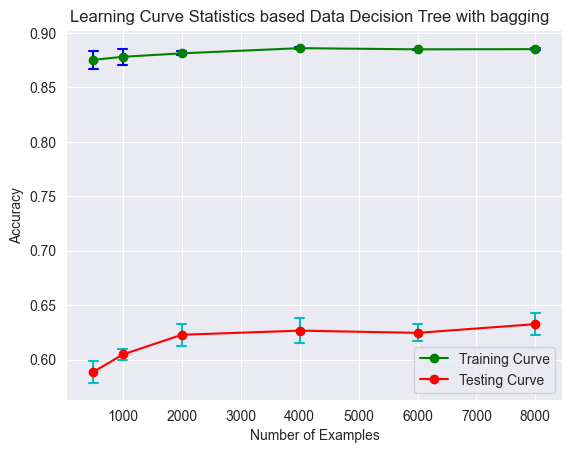

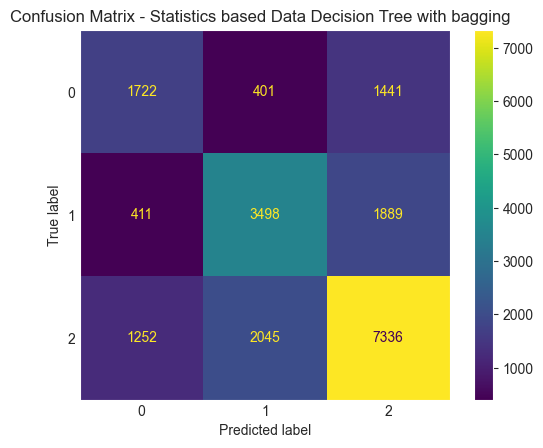

**********************************
Decision Tree with bagging   - Forward Selection based Data Default  Fold No -->  0
Train Accuracy - 0.6882375 Test Accuracy - 0.6778
ROC avg area under the curve 0.7982323494527492
Recall Score  0.6778
Precision Score  0.6873921694508385
F1 Score  0.6767672830490886
**********************************
**********************************
Decision Tree with bagging   - Forward Selection based Data Default  Fold No -->  1
Train Accuracy - 0.6886 Test Accuracy - 0.67675
ROC avg area under the curve 0.8022007925693487
Recall Score  0.67675
Precision Score  0.6867263655305758
F1 Score  0.6748764134798221
**********************************
**********************************
Decision Tree with bagging   - Forward Selection based Data Default  Fold No -->  2
Train Accuracy - 0.6863 Test Accuracy - 0.68615
ROC avg area under the curve 0.8080311072742253
Recall Score  0.68615
Precision Score  0.6943959657998617
F1 Score  0.6843719085142618
***********************

/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_862/670102968.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


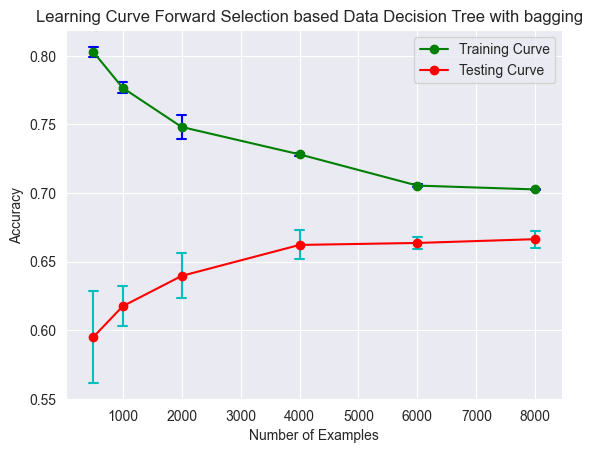

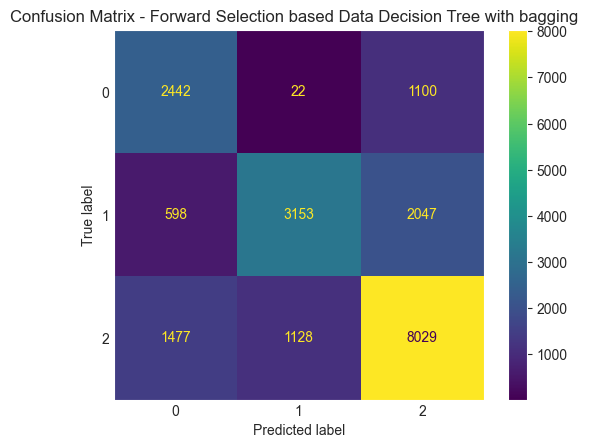

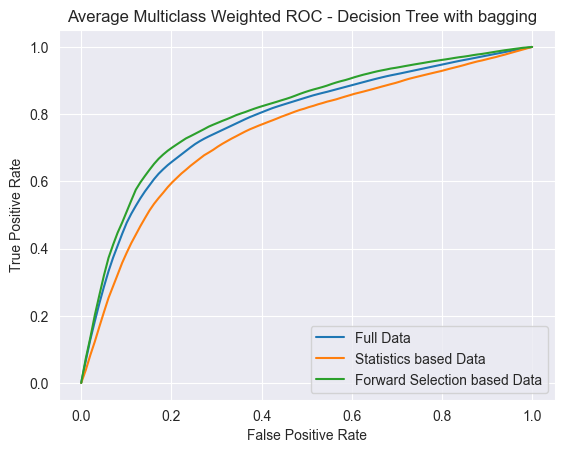

*********Summary***********
Avg Train Accuracies [0.9757100000000001, 0.86521, 0.68712]
Avg test Accuracies [0.6598, 0.6279100000000001, 0.68127]
Avg avg f1_scores Accuracies [0.6605628935252442, 0.6273042598867128, 0.6801911963184926]
Avg auc Accuracies [0.6391025228925364, 0.6209326248165572, 0.6496868963092783]
Ranking based on combined scores ['Forward Selection based Data' 'Full Data' 'Statistics based Data']
Best Selected Model Forward Selection based Data
   Train Accuracy  Test Accuracy  Precision   Recall  F1 Score  AUC Score  \
0         0.97571        0.65980   0.661660  0.65980  0.660563   0.639103   
1         0.86521        0.62791   0.627059  0.62791  0.627304   0.620933   
2         0.68712        0.68127   0.690924  0.68127  0.680191   0.649687   

   Combined Normalized Scores  Combined Rank  
0                    4.165458           5.25  
1                    3.916832           1.00  
2                    3.954226           6.50  


0

In [60]:
bagging_model = BaggingClassifier()
cv = StratifiedKFold()
cv_splits = cv.split(X,Y)
CV_splits_list = []
for splits in cv_splits:
    CV_splits_list += [splits]

t3,te3,f13,auc_score3,roc_vals3,results_dict_bagging= model_analysis(bagging_model,X,Y,CV_splits_list,selected_features,"Decision Tree with bagging  ",specs_name="Default",image_loc="Images/Bagging/bg")
train_acc_model_list_d.append(t3)
test_acc_model_list_d.append(te3)
f1_score_model_list_d.append(f13)
auc_score_model_list_d.append(auc_score3)
roc_vals_model_list_d.append(roc_vals3)
np.sum(np.array(roc_vals3)>1)

**************
       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    1.0              2.0            0.0          2.0   
1                    1.0              2.0            0.0          2.0   
2                    1.0              2.0            0.0          2.0   
3                    1.0              2.0            0.0          2.0   
4                    1.0              2.0            0.0          2.0   
...                  ...              ...            ...          ...   
99995                2.0              3.0            1.0          1.0   
99996                2.0              3.0            1.0          1.0   
99997                2.0              3.0            1.0          1.0   
99998                2.0              3.0            1.0          1.0   
99999                2.0              3.0            1.0          1.0   

       Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                      0.0      

/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_862/670102968.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


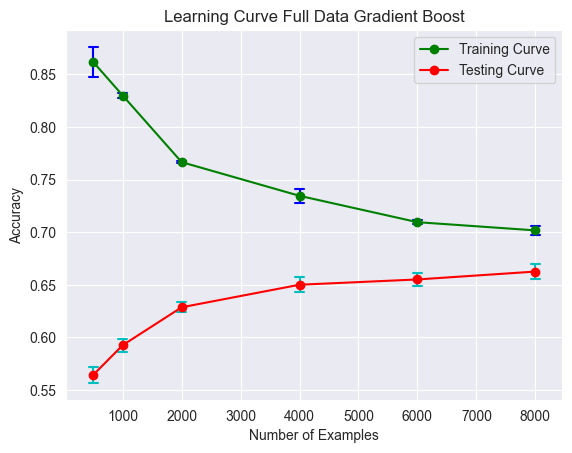

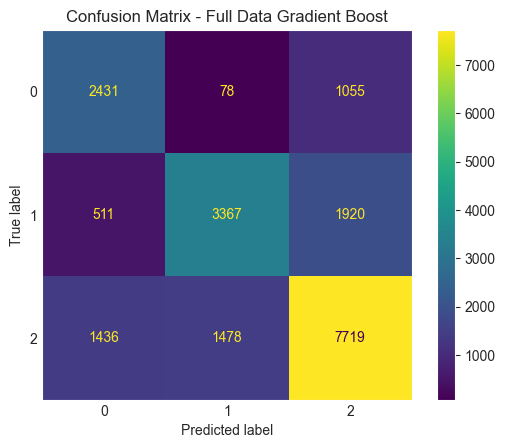

**********************************
Gradient Boost - Statistics based Data Default  Fold No -->  0
Train Accuracy - 0.6703625 Test Accuracy - 0.6618
ROC avg area under the curve 0.797308126602167
Recall Score  0.6618
Precision Score  0.6689751207100928
F1 Score  0.6619415371128845
**********************************
**********************************
Gradient Boost - Statistics based Data Default  Fold No -->  1
Train Accuracy - 0.668925 Test Accuracy - 0.66485
ROC avg area under the curve 0.8029276428628979
Recall Score  0.66485
Precision Score  0.6727996101894359
F1 Score  0.6655064695982114
**********************************
**********************************
Gradient Boost - Statistics based Data Default  Fold No -->  2
Train Accuracy - 0.669175 Test Accuracy - 0.6678
ROC avg area under the curve 0.8059487542842663
Recall Score  0.6678
Precision Score  0.6732499741386295
F1 Score  0.6686452825346035
**********************************
**********************************
Gradient Boost 

/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_862/670102968.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


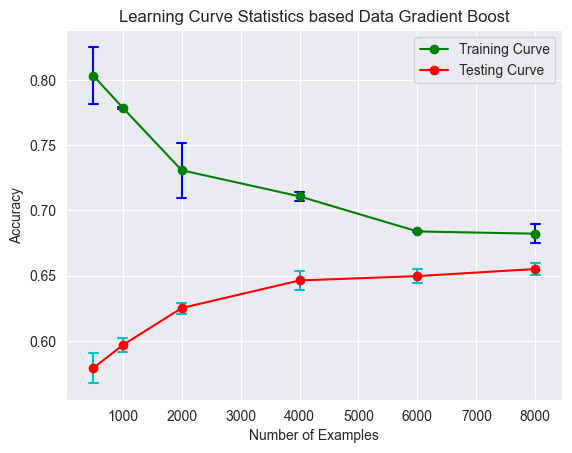

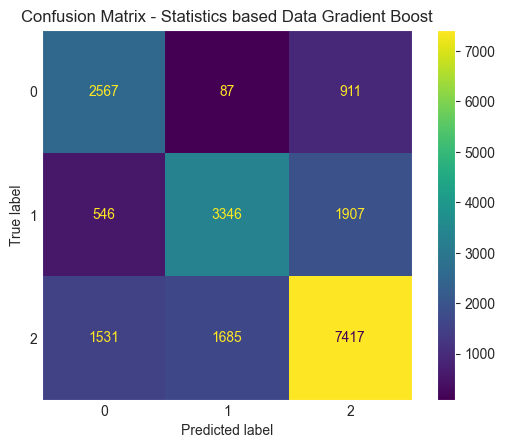

**********************************
Gradient Boost - Forward Selection based Data Default  Fold No -->  0
Train Accuracy - 0.649675 Test Accuracy - 0.64225
ROC avg area under the curve 0.7464180656051703
Recall Score  0.64225
Precision Score  0.6742703717563038
F1 Score  0.6449779651269346
**********************************
**********************************
Gradient Boost - Forward Selection based Data Default  Fold No -->  1
Train Accuracy - 0.648 Test Accuracy - 0.64895
ROC avg area under the curve 0.7535944627141452
Recall Score  0.64895
Precision Score  0.6819929220252973
F1 Score  0.6529738698319121
**********************************
**********************************
Gradient Boost - Forward Selection based Data Default  Fold No -->  2
Train Accuracy - 0.63315 Test Accuracy - 0.63205
ROC avg area under the curve 0.7531596167114714
Recall Score  0.63205
Precision Score  0.6542191285401968
F1 Score  0.6326194841388597
**********************************
*****************************

/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_862/670102968.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


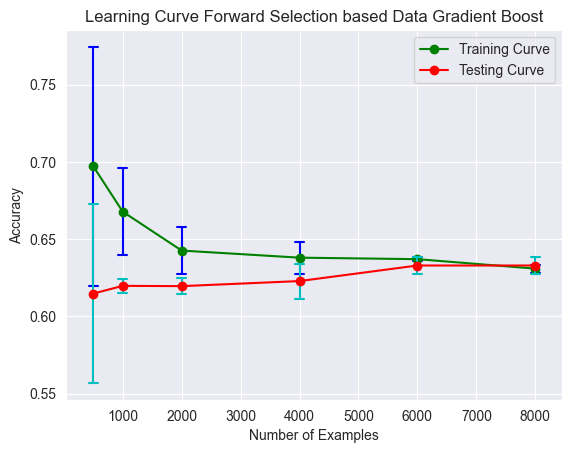

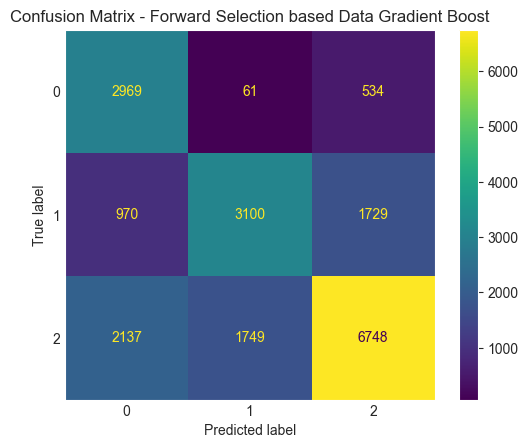

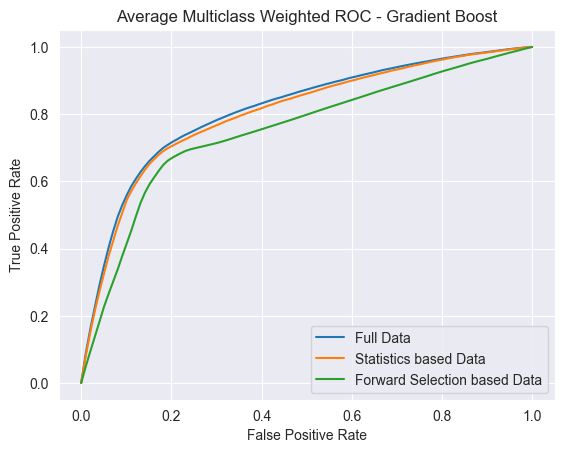

*********Summary***********
Avg Train Accuracies [0.6804874999999999, 0.6684849999999999, 0.6423875]
Avg test Accuracies [0.6759299999999999, 0.66657, 0.6408799999999999]
Avg avg f1_scores Accuracies [0.6760882859229611, 0.6671791317815865, 0.6427843150697499]
Avg auc Accuracies [0.6546520218013467, 0.6498801435912687, 0.6242698520716814]
Ranking based on combined scores ['Full Data' 'Statistics based Data' 'Forward Selection based Data']
Best Selected Model Full Data
   Train Accuracy  Test Accuracy  Precision   Recall  F1 Score  AUC Score  \
0        0.680487        0.67593   0.681071  0.67593  0.676088   0.654652   
1        0.668485        0.66657   0.673486  0.66657  0.667179   0.649880   
2        0.642388        0.64088   0.668557  0.64088  0.642784   0.624270   

   Combined Normalized Scores  Combined Rank  
0                    4.250000           8.50  
1                    4.194586           4.25  
2                    4.033523           0.00  


In [61]:
# gradboost
Gradboost_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
cv = StratifiedKFold()
cv_splits = cv.split(X,Y)
CV_splits_list = []
for splits in cv_splits:
    CV_splits_list += [splits]

t6,te6,f16,auc_score6,roc_vals6,results_dict_gb = model_analysis(Gradboost_model,X,Y,CV_splits_list,selected_features,"Gradient Boost",specs_name="Default",image_loc="Images/Gradient_Boosting/gb")

train_acc_model_list_d.append(t6)
test_acc_model_list_d.append(te6)
f1_score_model_list_d.append(f16)
auc_score_model_list_d.append(auc_score6)
roc_vals_model_list_d.append(roc_vals6)


**************
       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    1.0              2.0            0.0          2.0   
1                    1.0              2.0            0.0          2.0   
2                    1.0              2.0            0.0          2.0   
3                    1.0              2.0            0.0          2.0   
4                    1.0              2.0            0.0          2.0   
...                  ...              ...            ...          ...   
99995                2.0              3.0            1.0          1.0   
99996                2.0              3.0            1.0          1.0   
99997                2.0              3.0            1.0          1.0   
99998                2.0              3.0            1.0          1.0   
99999                2.0              3.0            1.0          1.0   

       Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                      0.0      

/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_862/670102968.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


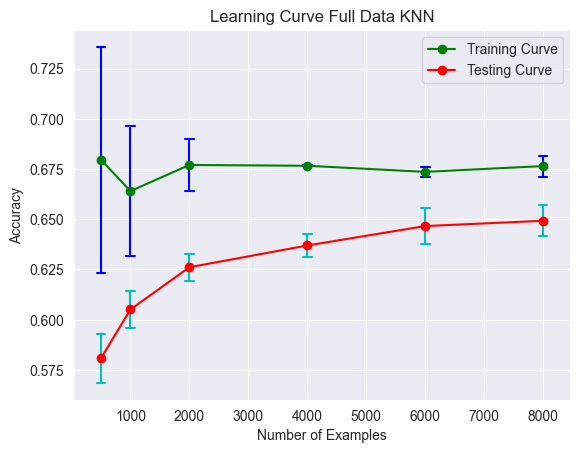

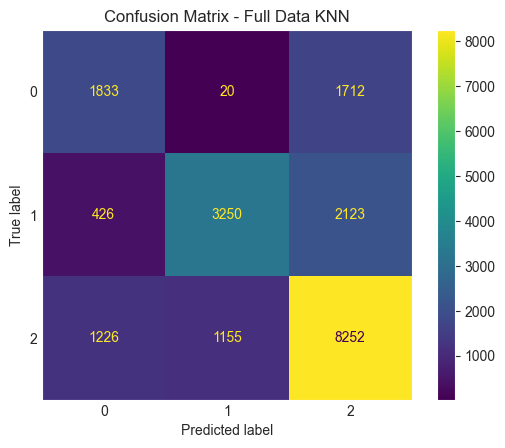

**********************************
KNN - Statistics based Data Default  Fold No -->  0
Train Accuracy - 0.6997625 Test Accuracy - 0.6652
ROC avg area under the curve 0.7994599705187851
Recall Score  0.6652
Precision Score  0.6682155585846516
F1 Score  0.6657238718996284
**********************************
**********************************
KNN - Statistics based Data Default  Fold No -->  1
Train Accuracy - 0.7001625 Test Accuracy - 0.6713
ROC avg area under the curve 0.8044982041889497
Recall Score  0.6713
Precision Score  0.6754109927672381
F1 Score  0.6716372559797199
**********************************
**********************************
KNN - Statistics based Data Default  Fold No -->  2
Train Accuracy - 0.698675 Test Accuracy - 0.66695
ROC avg area under the curve 0.8067230147328153
Recall Score  0.66695
Precision Score  0.6691743438784152
F1 Score  0.6677744239421145
**********************************
**********************************
KNN - Statistics based Data Default  Fold No -

/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_862/670102968.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


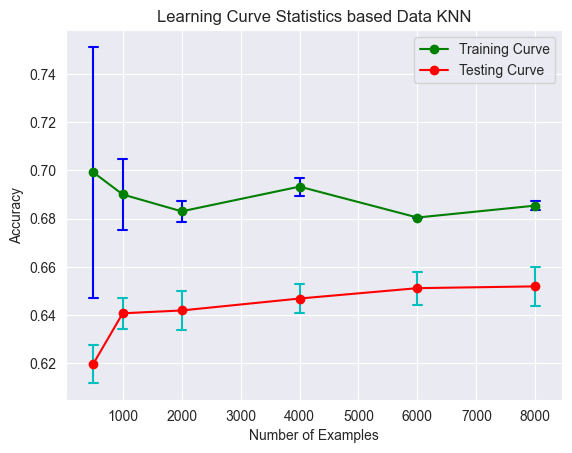

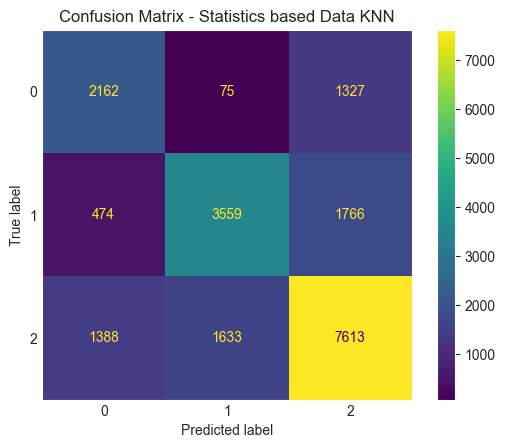

**********************************
KNN - Forward Selection based Data Default  Fold No -->  0
Train Accuracy - 0.6938125 Test Accuracy - 0.66985
ROC avg area under the curve 0.8024811784787276
Recall Score  0.66985
Precision Score  0.6772780580773249
F1 Score  0.6705677430282759
**********************************
**********************************
KNN - Forward Selection based Data Default  Fold No -->  1
Train Accuracy - 0.6933875 Test Accuracy - 0.6762
ROC avg area under the curve 0.8048809743215464
Recall Score  0.6762
Precision Score  0.6884347454805353
F1 Score  0.6776557371582747
**********************************
**********************************
KNN - Forward Selection based Data Default  Fold No -->  2
Train Accuracy - 0.6916 Test Accuracy - 0.687
ROC avg area under the curve 0.8124049850353919
Recall Score  0.687
Precision Score  0.6972716391159203
F1 Score  0.6888741386690357
**********************************
**********************************
KNN - Forward Selection based

/var/folders/lp/h2dbnrxd5kg2rqd_w_sgxhjw0000gn/T/ipykernel_862/670102968.py:97: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


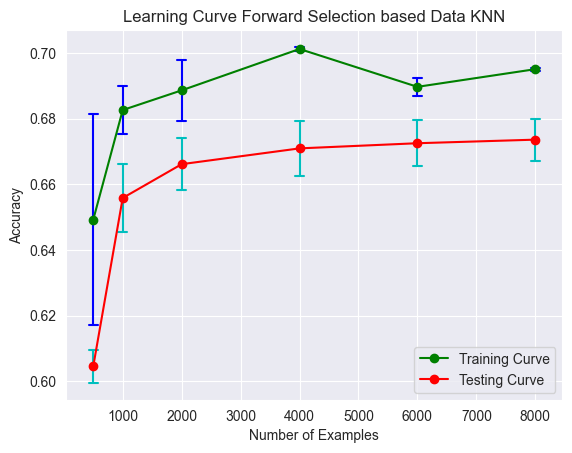

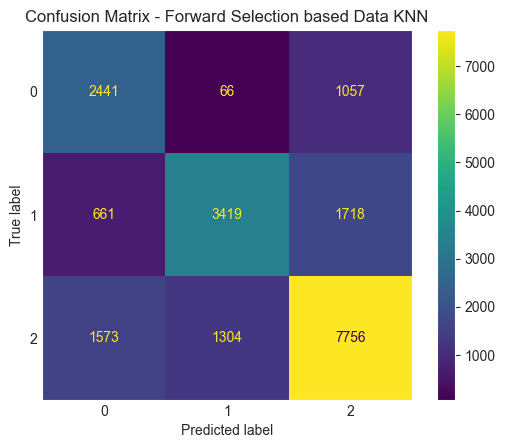

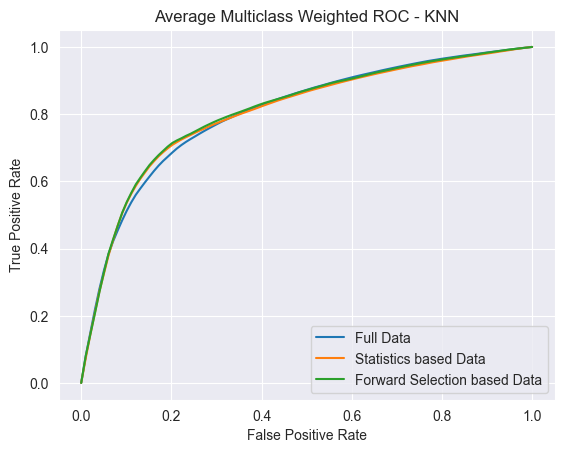

*********Summary***********
Avg Train Accuracies [0.695975, 0.6993400000000001, 0.6926525000000001]
Avg test Accuracies [0.66681, 0.66676, 0.68087]
Avg avg f1_scores Accuracies [0.6632641957773077, 0.6674383385362884, 0.6825420843557974]
Avg auc Accuracies [0.6498453371452447, 0.6503008103475499, 0.6521759517881769]
Ranking based on combined scores ['Forward Selection based Data' 'Statistics based Data' 'Full Data']
Best Selected Model Forward Selection based Data
   Train Accuracy  Test Accuracy  Precision   Recall  F1 Score  AUC Score  \
0        0.695975        0.66681   0.669775  0.66681  0.663264   0.649845   
1        0.699340        0.66676   0.669930  0.66676  0.667438   0.650301   
2        0.692653        0.68087   0.691838  0.68087  0.682542   0.652176   

   Combined Normalized Scores  Combined Rank  
0                    4.187558           2.25  
1                    4.199092           4.00  
2                    4.240437           6.50  


In [62]:
KNN_model = KNeighborsClassifier(n_neighbors=100)
cv = StratifiedKFold()
cv_splits = cv.split(X,Y)
CV_splits_list = []
for splits in cv_splits:
    CV_splits_list += [splits]

t4,te4,f14,auc_score4,roc_vals4,results_dict_knn = model_analysis(KNN_model,X,Y,CV_splits_list,selected_features,"KNN",specs_name="Default",image_loc="Images/KNN/knn")
train_acc_model_list_d.append(t4)
test_acc_model_list_d.append(te4)
f1_score_model_list_d.append(f14)
auc_score_model_list_d.append(auc_score4)
roc_vals_model_list_d.append(roc_vals4)

**************
       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    1.0              2.0            0.0          2.0   
1                    1.0              2.0            0.0          2.0   
2                    1.0              2.0            0.0          2.0   
3                    1.0              2.0            0.0          2.0   
4                    1.0              2.0            0.0          2.0   
...                  ...              ...            ...          ...   
99995                2.0              3.0            1.0          1.0   
99996                2.0              3.0            1.0          1.0   
99997                2.0              3.0            1.0          1.0   
99998                2.0              3.0            1.0          1.0   
99999                2.0              3.0            1.0          1.0   

       Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                      0.0      

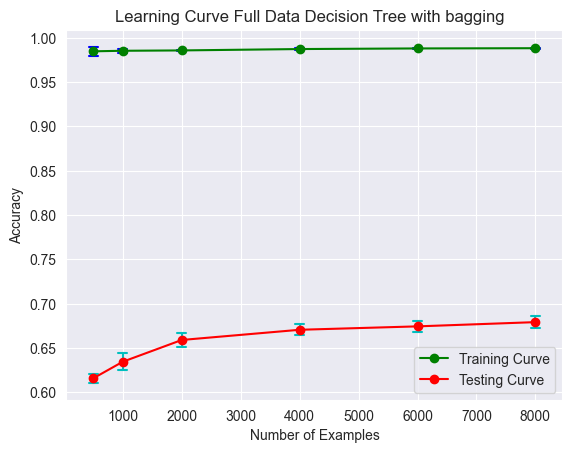

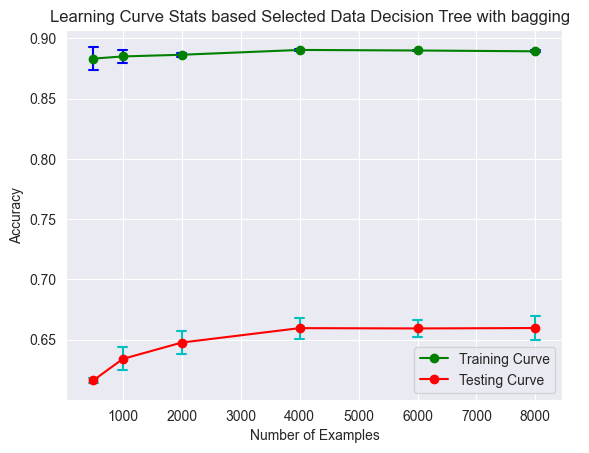

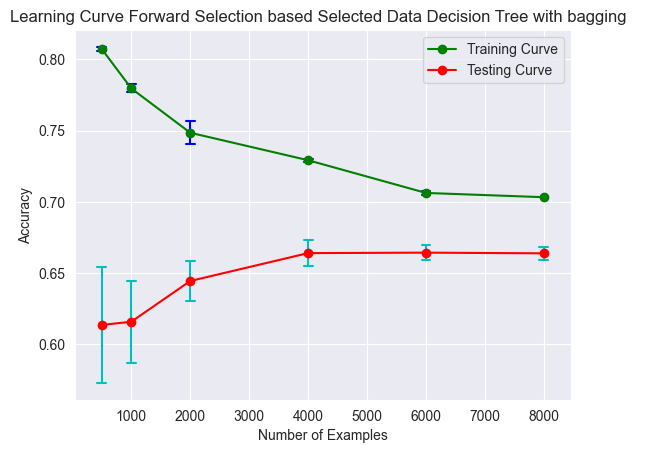

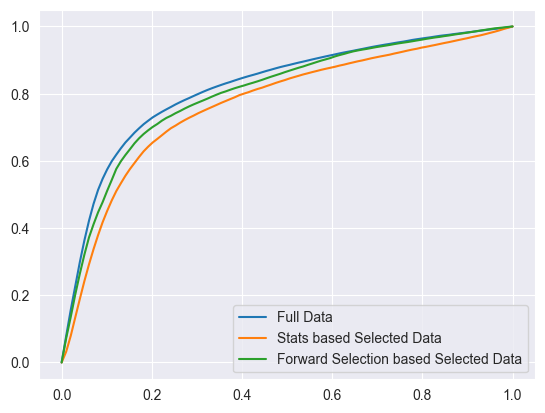

*********Summary***********
Avg Train Accuracies [0.9898825, 0.8695325, 0.6871974999999999]
Avg test Accuracies [0.69212, 0.64886, 0.68136]
Avg avg f1_scores Accuracies [0.6927817787316892, 0.6488685770252233, 0.6805887883516281]
Avg auc Accuracies [0.6582543509460067, 0.6335993217242195, 0.6497784355556823]
Ranking based on combined scores ['Full Data' 'Forward Selection based Selected Data'
 'Stats based Selected Data']
Best Selected Model Full Data


0

In [84]:
random_forest_model = RandomForestClassifier()
cv = StratifiedKFold()
cv_splits = cv.split(X,Y)
CV_splits_list = []
for splits in cv_splits:
    CV_splits_list += [splits]

t4,te4,f14,auc_score4,roc_vals4= model_analysis(random_forest_model,X,Y,CV_splits_list,selected_features,"Decision Tree with bagging  ",specs_name="Default")
train_acc_model_list_d.append(t4)
test_acc_model_list_d.append(te4)
f1_score_model_list_d.append(f14)
auc_score_model_list_d.append(auc_score4)
roc_vals_model_list_d.append(roc_vals4)
np.sum(np.array(roc_vals4)>1)

(100000, 11) (100000, 3)
**********************************
Naive bayes  - Full Data Default  Fold No -->  0
Train Accuracy - 0.635975 Test Accuracy - 0.63865
ROC avg area under the curve 0.748089842873176
F1 Score  0.6436362155982177
**********************************
**********************************
Naive bayes  - Full Data Default  Fold No -->  1
Train Accuracy - 0.6365875 Test Accuracy - 0.6366
ROC avg area under the curve 0.7506664166921743
F1 Score  0.6418905980707568
**********************************
**********************************
Naive bayes  - Full Data Default  Fold No -->  2
Train Accuracy - 0.63685 Test Accuracy - 0.63865
ROC avg area under the curve 0.7455689776553412
F1 Score  0.6432002850650943
**********************************
**********************************
Naive bayes  - Full Data Default  Fold No -->  3
Train Accuracy - 0.639275 Test Accuracy - 0.6273
ROC avg area under the curve 0.7437249719416387
F1 Score  0.6318751683196332
*****************************

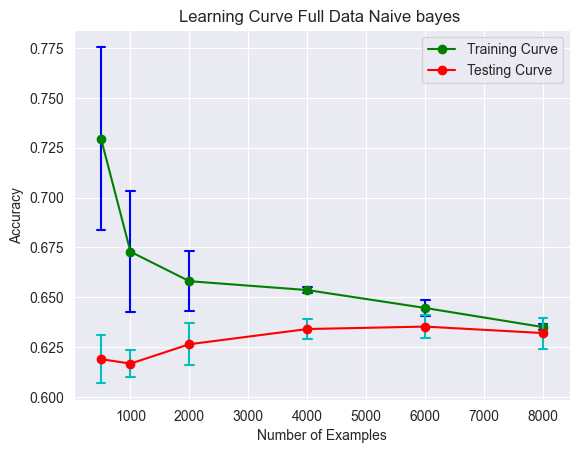

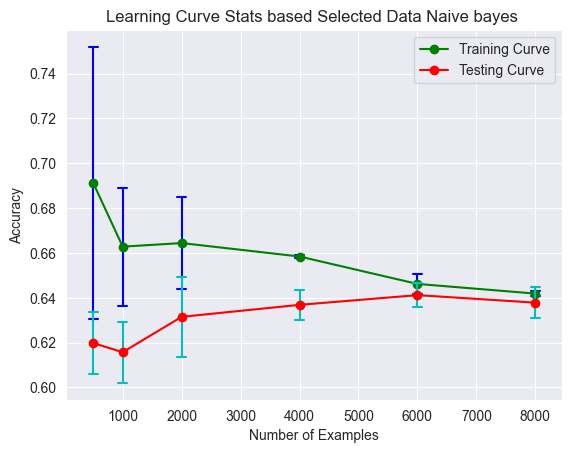

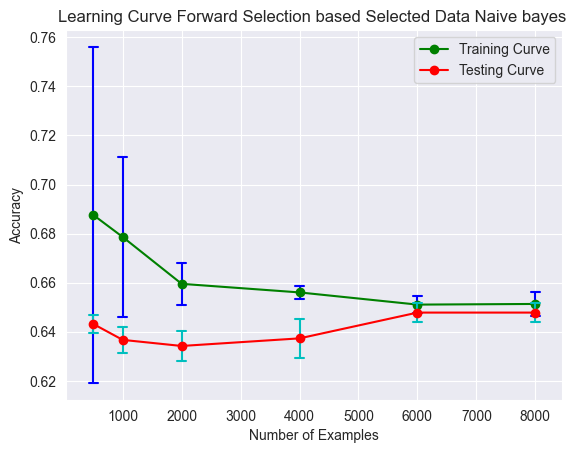

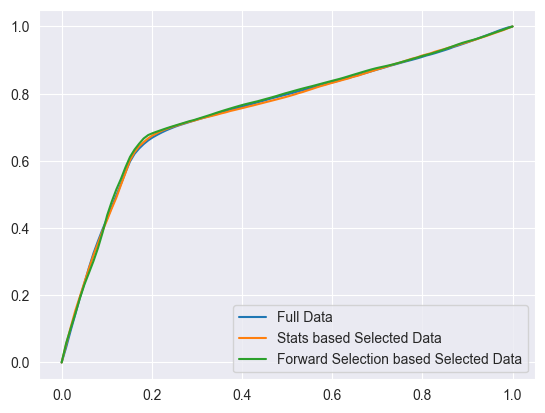

*********Summary***********
Avg Train Accuracies [0.6367424999999999, 0.6409050000000001, 0.64571]
Avg test Accuracies [0.6361000000000001, 0.6405799999999999, 0.64571]
Avg avg f1_scores Accuracies [0.6407239058619326, 0.6457936246303048, 0.6501952409130483]
Avg auc Accuracies [0.6232125295454546, 0.6229784044679844, 0.6250142530153707]
Ranking based on combined scores ['Forward Selection based Selected Data' 'Stats based Selected Data'
 'Full Data']
Best Selected Model Forward Selection based Selected Data


In [21]:
NB_model = GaussianNB()
cv = StratifiedKFold()
cv_splits = cv.split(X,Y)
CV_splits_list = []
for splits in cv_splits:
    CV_splits_list += [splits]

t5,te5,f15,auc_score5,roc_vals5 = model_analysis(NB_model,X,Y,CV_splits_list,selected_features,"Naive bayes ",specs_name="Default")
train_acc_model_list_d.append(t5)
test_acc_model_list_d.append(te5)
f1_score_model_list_d.append(f15)
auc_score_model_list_d.append(auc_score5)
roc_vals_model_list_d.append(roc_vals5)

In [45]:
#SVM_Classifier
SVM_model = SVC()
SVM_model.fit(X, Y)
Y_prime = SVM_model.predict(X_test)
test_acc = accuracy_score(Y_test, Y_prime)
print(test_acc)



KeyboardInterrupt: 

(100000, 11) (100000, 4)
**********************************
XG boos  - Full Data Default  Fold No -->  0
Train Accuracy - 0.9899 Test Accuracy - 0.5755
ROC avg area under the curve 0.6417722457408221
F1 Score  0.575376279180287
**********************************
**********************************
XG boos  - Full Data Default  Fold No -->  1
Train Accuracy - 0.989875 Test Accuracy - 0.57845
ROC avg area under the curve 0.6469161814495918
F1 Score  0.578830002638941
**********************************
**********************************
XG boos  - Full Data Default  Fold No -->  2
Train Accuracy - 0.9901375 Test Accuracy - 0.56975
ROC avg area under the curve 0.6374081016585978
F1 Score  0.570052182272322
**********************************
**********************************
XG boos  - Full Data Default  Fold No -->  3
Train Accuracy - 0.9898 Test Accuracy - 0.5761
ROC avg area under the curve 0.6444368476922852
F1 Score  0.5766709097985547
**********************************
***************

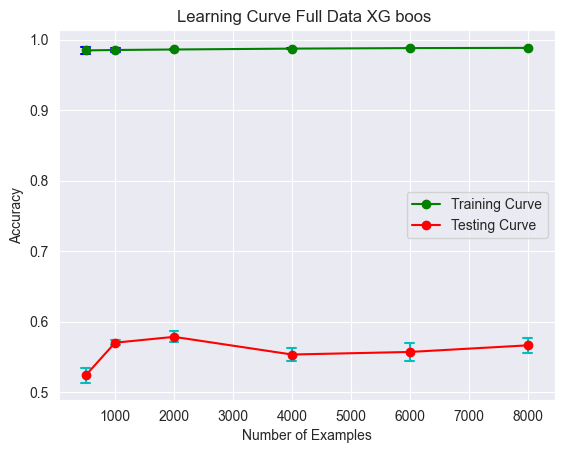

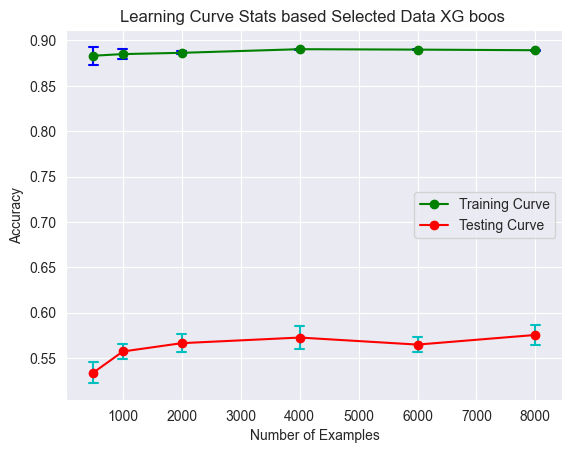

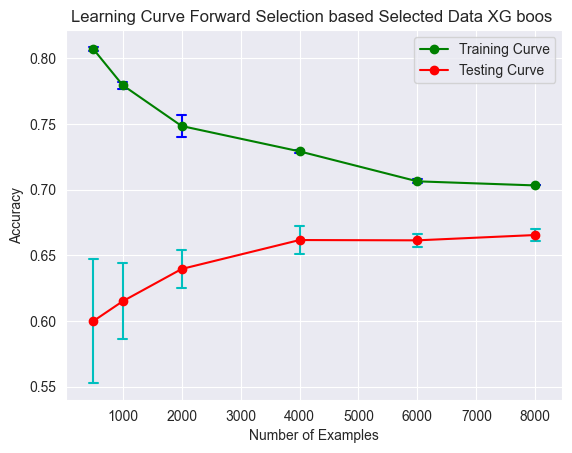

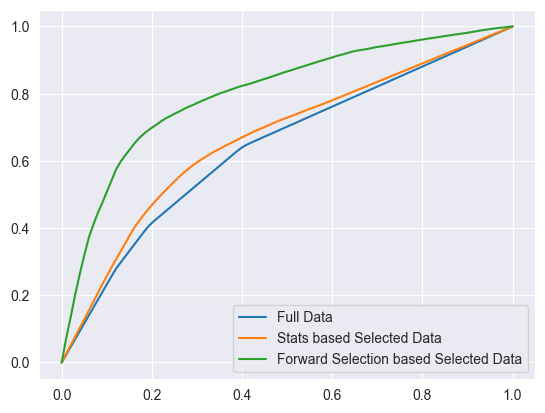

*********Summary***********
Avg Train Accuracies [0.9899025, 0.8695375000000001, 0.6872]
Avg test Accuracies [0.5755899999999999, 0.57803, 0.68171]
Avg avg f1_scores Accuracies [0.5758243031915466, 0.5806264012355532, 0.6810432082055305]
Avg auc Accuracies [0.5707539610637753, 0.5834664315665823, 0.6497316507398313]
Ranking based on combined scores ['Forward Selection based Selected Data' 'Stats based Selected Data'
 'Full Data']
Best Selected Model Forward Selection based Selected Data


In [39]:

# Xgboost
xgb_model  = xgb.XGBClassifier()
cv = StratifiedKFold()
cv_splits = cv.split(X,Y)
CV_splits_list = []
for splits in cv_splits:
    CV_splits_list += [splits]

t2,te2,f12,auc_score2,roc_vals2 = model_analysis(xgb_model,X,Y,CV_splits_list,selected_features,"XG boost ",specs_name="Default")



In [29]:
np.sum(np.array(roc_vals5)>1)


0

In [23]:
print(train_acc_model_list_d)
print("--------------------")
print(test_acc_model_list_d)
print("--------------------")
print(f1_score_model_list_d)
print("--------------------")
print(auc_score_model_list_d)
print("--------------------")
print(roc_vals_model_list_d)

[[0.651225, 0.6481125, 0.647775, 0.64915, 0.6467375], [0.6883375, 0.688625, 0.686475, 0.6883875, 0.684175], [0.6882625, 0.688625, 0.68635, 0.6883625, 0.6841375], [0.6132, 0.6552625, 0.61185, 0.657425, 0.652575], [0.6456875, 0.6459125, 0.646375, 0.6461375, 0.6444375], [0.6825625, 0.681275, 0.6794625, 0.6818375, 0.6773]]
--------------------
[[0.6405, 0.65315, 0.64895, 0.64095, 0.65285], [0.6785, 0.6778, 0.68555, 0.67425, 0.69245], [0.6779, 0.67785, 0.68635, 0.6747, 0.69175], [0.6143, 0.65245, 0.6068, 0.6443, 0.6658], [0.6458, 0.6449, 0.64305, 0.644, 0.6508], [0.67065, 0.6762, 0.67975, 0.6683, 0.68475]]
--------------------
[[0.6356234507848201, 0.6484962545766295, 0.6447974934080419, 0.6367527980261549, 0.6479381991898127], [0.6778160457405732, 0.6764529009073645, 0.6848827933338857, 0.6746814700130362, 0.6913828310327932], [0.6771012130594715, 0.6765014874520608, 0.6844856371090111, 0.6752654147675162, 0.6906616612485336], [0.6186157929631039, 0.655537349719525, 0.6095809342678882, 0.6

In [31]:
np.sum(np.array(roc_vals)>1)

0

In [26]:
def final_model_analysis(X_types,train_acc_model_list,test_acc_model_list, f1_score_model_list, auc_score_model_list, roc_vals_model_list):
    roc_vals_model_list2 = roc_vals_model_list
    avg_train_model_acc = []
    avg_test_model_acc = []
    avg_f1_model = []
    avg_auc_model = []
    avg_kfold_fpr_model = []
    avg_kfold_tpr_model = []
    for ind_X in range(len(X_types)):
        avg_train_model_acc += [np.mean(train_acc_model_list[ind_X])]
        avg_test_model_acc += [np.mean(test_acc_model_list[ind_X])]
        avg_f1_model += [np.mean(f1_score_model_list[ind_X])]
        avg_auc_model += [np.mean(roc_vals_model_list[ind_X])]

    rank_train_model = np.argsort(np.argsort(avg_train_model_acc))
    rank_test_model = np.argsort(np.argsort(avg_test_model_acc))
    rank_f1_model = np.argsort(np.argsort(avg_f1_model))
    rank_auc_model = np.argsort(np.argsort(avg_auc_model))
    combined_positions_model = np.flip(np.argsort(rank_train_model+1.25*rank_test_model+rank_f1_model+rank_auc_model))
    plt.figure()
    for inds2 in range(len(X_types)):
        avg_kfold_fpr_model = np.zeros_like(np.array(roc_vals_model_list[inds2][0][0])) #index, fold number, tpr
        avg_kfold_tpr_model = np.zeros_like(np.array(roc_vals_model_list[inds2][0][1]))
        for inds3 in range(5):
            avg_kfold_fpr_model += roc_vals_model_list[inds2][inds3][0]
            avg_kfold_tpr_model += roc_vals_model_list[inds2][inds3][1]
        plt.plot(avg_kfold_fpr_model/5,avg_kfold_tpr_model/5)
    plt.legend(X_types)
    plt.show()
    print("*********Summary***********")
    print("Avg Train Accuracies",avg_train_model_acc)
    print("Avg Test Accuracies",avg_test_model_acc)
    print("Avg F1_scores Accuracies",avg_f1_model)
    print("Avg AUC Accuracies",avg_auc_model)
    print("Ranking based on combined scores",np.array(X_types)[combined_positions_model])

    best_X = combined_positions_model[0]
    print("Best Selected Model",X_types[best_X])
    print(np.sum(np.array(roc_vals_model_list)==np.array(roc_vals_model_list2)))
    return train_acc_model_list[best_X],test_acc_model_list[best_X],f1_score_model_list[best_X],auc_score_model_list[best_X],roc_vals_model_list[best_X]




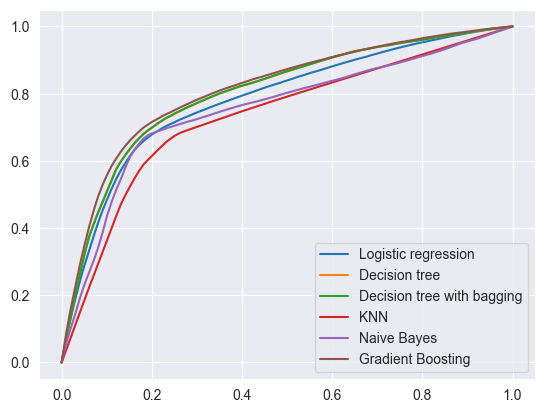

*********Summary***********
Avg Train Accuracies [0.6486, 0.6872, 0.6871474999999999, 0.6380625, 0.64571, 0.6804874999999999]
Avg Test Accuracies [0.6472800000000001, 0.68171, 0.68171, 0.63673, 0.64571, 0.6759299999999999]
Avg F1_scores Accuracies [0.6427216391970918, 0.6810432082055305, 0.6808030827273186, 0.6398393366756293, 0.6501952409130483, 0.6760882859229611]
Avg AUC Accuracies [0.6400544775252526, 0.6497337281913039, 0.6497594657190712, 0.6154534136848211, 0.6250142530153707, 0.6546520218013467]
Ranking based on combined scores ['Decision tree with bagging' 'Decision tree' 'Gradient Boosting'
 'Logistic regression' 'Naive Bayes' 'KNN']
Best Selected Model Decision tree with bagging
6000


In [27]:
X_types = ["Logistic regression","Decision tree","Decision tree with bagging","KNN","Naive Bayes","Gradient Boosting"]

tf,tef,f1f,auc_scoref,roc_valsf = final_model_analysis(X_types, train_acc_model_list_d, test_acc_model_list_d,f1_score_model_list_d, auc_score_model_list_d,roc_vals_model_list_d)


In [141]:
print(roc_vals_model_list_d)

[[[array([ 0.        ,  0.29292929,  0.58585859,  0.87878788,  1.17171717,
        1.46464646,  1.75757576,  2.05050505,  2.34343434,  2.63636364,
        2.92929293,  3.22222222,  3.51515152,  3.80808081,  4.1010101 ,
        4.39393939,  4.68686869,  4.97979798,  5.27272727,  5.56565657,
        5.85858586,  6.15151515,  6.44444444,  6.73737374,  7.03030303,
        7.32323232,  7.61616162,  7.90909091,  8.2020202 ,  8.49494949,
        8.78787879,  9.08080808,  9.37373737,  9.66666667,  9.95959596,
       10.25252525, 10.54545455, 10.83838384, 11.13131313, 11.42424242,
       11.71717172, 12.01010101, 12.3030303 , 12.5959596 , 12.88888889,
       13.18181818, 13.47474747, 13.76767677, 14.06060606, 14.35353535,
       14.64646465, 14.93939394, 15.23232323, 15.52525253, 15.81818182,
       16.11111111, 16.4040404 , 16.6969697 , 16.98989899, 17.28282828,
       17.57575758, 17.86868687, 18.16161616, 18.45454545, 18.74747475,
       19.04040404, 19.33333333, 19.62626263, 19.91919192, 20

In [24]:
neural_net_model = MLPClassifier(hidden_layer_sizes =(20,10,3,),learning_rate="invscaling", verbose=False, n_iter_no_change=30)#hidden_layer_sizes =(100,),verbose=True)# (50,20,3))
neural_net_model.fit(X_train, Y_train)
Y_prime = neural_net_model.predict(X_test)
test_acc = accuracy_score(Y_test, Y_prime)
print(test_acc)

0.70525


/Users/sangitajayendran/PycharmProjects/ML_mini_project/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
Y_prime2 = neural_net_model.predict(X_train)
train_acc = accuracy_score(Y_train, Y_prime2)
print(train_acc)

0.7102125


In [ ]:
# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, Y_train)
Y_prime = adaboost_model.predict(X_test)
test_acc = accuracy_score(Y_test, Y_prime)
print(test_acc)

In [ ]:
X_in = X.iloc[:,selected_features]
X_train,X_test = X_in.iloc[CV_splits_list[0][0],:], X_in.iloc[CV_splits_list[0][1],:]
print(X_in.info())
print(X_train.info())
print(X_test.info())

Full Data avg train acc 0.5437375
Full Data avg test acc 0.54345
Full Data avg f1 score 0.4855016066422291
Full Data avg auc acc 0.6302415151515152
Stats based Selected Data avg train acc 0.5983924999999999
Stats based Selected Data avg test acc 0.59803
Stats based Selected Data avg f1 score 0.58338676530476
Stats based Selected Data avg auc acc 0.7347058198143046
Forward Selection based Selected Data avg train acc 0.635645
Forward Selection based Selected Data avg test acc 0.6350200000000001
Forward Selection based Selected Data avg f1 score 0.6158657314586744
Forward Selection based Selected Data avg auc acc 0.7472979486155445


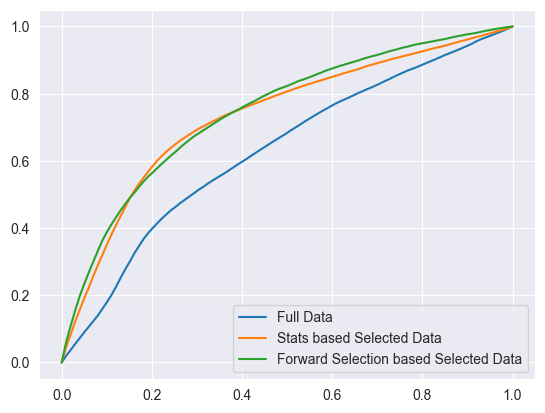

In [106]:
X_names = ["Full Data","Stats based Selected Data","Forward Selection based Selected Data"]
avg_train_acc = []
avg_test_acc = []
avg_f1 = []
avg_auc = []
for inds2 in range(3):
    avg_train_acc += [np.mean(train_acc_dict[inds2])]
    avg_test_acc += [np.mean(test_acc_dict[inds2])]
    avg_f1 += [np.mean(f1_score_dict[inds2])]
    avg_auc += [np.mean(auc_score_dict[inds2])]

sorted_train = np.argsort(avg_train_acc)
sorted_test = np.argsort(avg_train_acc)
sorted_f1 = np.argsort(avg_train_acc)
sorted_auc = np.argsort(avg_train_acc)

np.argwhere()




plt.figure()
for inds2 in range(3):
    avg_kfold_fpr = roc_vals_dict[inds2][0][0]
    avg_kfold_tpr = roc_vals_dict[inds2][0][1]
    for inds3 in range(1,5):
        avg_kfold_fpr += roc_vals_dict[inds2][inds3][0]
        avg_kfold_tpr += roc_vals_dict[inds2][inds3][1]
    plt.plot(avg_kfold_fpr/5,avg_kfold_tpr/5)
plt.legend(X_names)



In [125]:
X_names = ["Full Data","Stats based Selected Data","Forward Selection based Selected Data"]
avg_train_acc = []
avg_test_acc = []
avg_f1 = []
avg_auc = []
for inds2 in range(3):
    avg_train_acc += [np.mean(train_acc_dict[inds2])]
    avg_test_acc += [np.mean(test_acc_dict[inds2])]
    avg_f1 += [np.mean(f1_score_dict[inds2])]
    avg_auc += [np.mean(auc_score_dict[inds2])]

rank_train = np.argsort(np.argsort(avg_train_acc))
rank_test = np.argsort(np.argsort(avg_test_acc))
rank_f1 = np.argsort(np.argsort(avg_f1))
rank_auc = np.argsort(np.argsort(avg_auc))
combined_positions = np.flip(np.argsort(rank_train+1.25*rank_test+rank_f1+rank_auc))
print(np.array(X_names)[combined_positions])

['Forward Selection based Selected Data' 'Stats based Selected Data'
 'Full Data']
